In [30]:
# Melakukan download dataset pada google drive 
# https://docs.google.com/spreadsheets/d/187zDetHTNzpwXFC6zfNtKF-GLEjUZtQJ/edit?usp=sharing&ouid=109330686360258100205&rtpof=true&sd=true

!gdown 187zDetHTNzpwXFC6zfNtKF-GLEjUZtQJ

Downloading...
From: https://drive.google.com/uc?id=187zDetHTNzpwXFC6zfNtKF-GLEjUZtQJ
To: /content/traintest.xlsx
100% 17.7k/17.7k [00:00<00:00, 24.8MB/s]


In [31]:
# Import Library pandas
import pandas as pd

# Proses pembacaan data latih/uji
dataFrameTrain = pd.read_excel('traintest.xlsx')
dataFrameTest = pd.read_excel('traintest.xlsx', sheet_name='test')
dataFrameTrain.head()

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0
3,4,34,60,0,1
4,5,38,69,21,0


In [32]:
dataFrameTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      296 non-null    int64
 1   x1      296 non-null    int64
 2   x2      296 non-null    int64
 3   x3      296 non-null    int64
 4   y       296 non-null    int64
dtypes: int64(5)
memory usage: 11.7 KB


In [6]:
# describing data to get mean and std
# output data 0 or 1
def att_desc(output_data):
    return dataFrameTrain[dataFrameTrain['y'] == output_data].describe()

In [7]:
# get mean and std for worthy or acceptable
x1meanWorthy = att_desc(1)['x1']['mean']
x1stdWorthy = att_desc(1)['x1']['std']

x2meanWorthy = att_desc(1)['x2']['mean']
x2stdWorthy = att_desc(1)['x2']['std']

x3meanWorthy = att_desc(1)['x3']['mean']
x3stdWorthy = att_desc(1)['x3']['std']

print(x1meanWorthy, x2meanWorthy, x3meanWorthy)
print(x1stdWorthy, x2stdWorthy, x3stdWorthy)

51.93577981651376 62.92660550458716 2.8394495412844036
11.110484299554662 3.2220622586310936 5.953499042384453


In [8]:
# get mean and std for unworthy or unacceptable
x1meanUnWorthy = att_desc(0)['x1']['mean']
x1stdUnWorthy = att_desc(0)['x1']['std']

x2meanUnWorthy = att_desc(0)['x2']['mean']
x2stdUnWorthy = att_desc(0)['x2']['std']

x3meanUnWorthy = att_desc(0)['x3']['mean']
x3stdUnWorthy = att_desc(0)['x3']['std']

print(x1meanUnWorthy, x2meanUnWorthy, x3meanUnWorthy)
print(x1stdUnWorthy, x2stdUnWorthy, x3stdUnWorthy)

53.93589743589744 62.756410256410255 7.666666666666667
10.198471675149396 3.2839076241650416 9.296929623961903


In [9]:
lenghtOfAcceptableData = len(dataFrameTrain[dataFrameTrain['y'] == 1.0])
lenghtOfUnAcceptableData = len(dataFrameTrain[dataFrameTrain['y'] == 0.0])

lenghtOfAllAdata = len(dataFrameTrain)

print("Acceptable data = {} Unacceptable data = {} All data = {}".format(lenghtOfAcceptableData, lenghtOfUnAcceptableData, lenghtOfAllAdata))

Acceptable data = 218 Unacceptable data = 78 All data = 296


In [10]:
import math 

# calculate probability using formula
def calc_probability(x, mean, std):
  exponent = math.exp(-((x-mean)**2 / (2*std**2)))
  
  return (1 / (math.sqrt(2 * math.pi) * std)) * exponent

# decide classification
def decide_classification(x1Test, x2Test, x3Test):
  probWorthy1 = calc_probability(x1Test, x1meanWorthy, x1stdWorthy)
  probWorthy2 = calc_probability(x2Test, x2meanWorthy, x2stdWorthy)
  probWorthy3 = calc_probability(x3Test, x3meanWorthy, x3stdWorthy)
  pWorthy = (lenghtOfAcceptableData/lenghtOfAllAdata) * probWorthy1 * probWorthy2 * probWorthy3

  probUnWorthy1 = calc_probability(x1Test, x1meanUnWorthy, x1stdUnWorthy)
  probUnWorthy2 = calc_probability(x2Test, x2meanUnWorthy, x2stdUnWorthy)
  probUnWorthy3 = calc_probability(x3Test, x3meanUnWorthy, x3stdUnWorthy)
  pUnWorthy = (lenghtOfAcceptableData/lenghtOfAllAdata) * probUnWorthy1 * probUnWorthy2 * probUnWorthy3

  print('probability for y = 1 -> {}'.format(pWorthy))
  print('probability for y = 0 -> {}'.format(pUnWorthy))

  acceptable = 0
  if(pWorthy > pUnWorthy):
    # test data acceptable
    acceptable = 1
  else:
    # test data unacceptable
    acceptable = 0
  return acceptable

### **Validasi model dengan data train (actual data)**
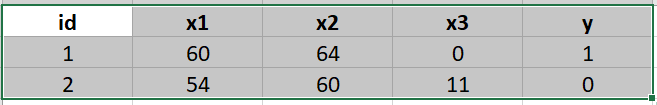

In [39]:
# Contoh pengujian model dari data train dengan y = 1
print('====== Contoh pengujian model dari data train dengan y = 1 ======')
example1 = decide_classification(60, 64, 0)
print('x1 x2 x3 -> y')
print('60 64 0  -> {}\n'.format(example1))

# Contoh pengujian model dari data train dengan y = 0
print('====== Contoh pengujian model dari data train dengan y = 0 ======')
example2 = decide_classification(54, 60, 11)
print('x1 x2 x3 -> y')
print('54 60 11 -> {}'.format(example2))

====== Contoh pengujian model dari data train dengan y = 1 ======
probability for y = 1 -> 0.00014235259904175774
probability for y = 0 -> 8.33768749286531e-05
x1 x2 x3 -> y
60 64 0  -> 1

====== Contoh pengujian model dari data train dengan y = 0 ======
probability for y = 1 -> 5.579842149789035e-05
probability for y = 0 -> 9.901868657641887e-05
x1 x2 x3 -> y
54 60 11 -> 0


In [38]:
# MAIN PROGRAM
dataFrameTest.head()
dataFrameTest.reset_index()
id = []
x1 = []
x2 = []
x3 = []
y = []

print('Hasil prediksi :')
for index, row in dataFrameTest.iterrows():
  output = decide_classification(row['x1'], row['x2'], row['x3'])

  id.append(row['id'])
  x1.append(row['x1'])
  x2.append(row['x2'])
  x3.append(row['x3'])
  y.append(output)

  print("{} {} {}  -> {}".format(row['x1'], row['x2'], row['x3'], output))
  print()

resultData = {'id': id, 'x1': x1, 'x2': x2, 'x3': x3, 'y': y}
resultTable = pd.DataFrame(resultData)
resultTable.to_excel('output_test.xlsx')

Hasil prediksi :
probability for y = 1 -> 7.481434681154436e-05
probability for y = 0 -> 3.648713421898173e-05
43 59 2  -> 1

probability for y = 1 -> 4.9556264176595006e-05
probability for y = 0 -> 2.889284011041653e-05
67 66 0  -> 1

probability for y = 1 -> 0.00012510034528011692
probability for y = 0 -> 8.59892133965905e-05
58 60 3  -> 1

probability for y = 1 -> 0.00021175024633781806
probability for y = 0 -> 0.00011745111797483857
49 63 3  -> 1

probability for y = 1 -> 0.00010668196392365889
probability for y = 0 -> 5.119908450225542e-05
45 60 0  -> 1

probability for y = 1 -> 6.387932395668814e-05
probability for y = 0 -> 4.068340781519206e-05
54 58 1  -> 1

probability for y = 1 -> 0.00013015787337867794
probability for y = 0 -> 7.96477760038536e-05
56 66 3  -> 1

probability for y = 1 -> 2.3732606847822938e-05
probability for y = 0 -> 9.606952640595343e-06
42 69 1  -> 1

probability for y = 1 -> 0.00010182474623897362
probability for y = 0 -> 6.018422917678821e-05
50 59 2  ->